<div class='container' style='border-bottom: 1px solid; width:100%'>
    <div style='float:left'>
    Bernat Esquirol & Pere Gilabert 
    </div>
    <div style='float:right'>
    Complex Networks 2019
    </div>
</div>

# Delivery 02: Macroscale

### Import created graphs

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
from matplotlib import pyplot as plt

%matplotlib inline

# songs = pd.read_pickle('../data/songs.pkl')
# songs['artist']=songs['artists'].apply(lambda x: x[0][1])
# playlists = pd.read_pickle('../data/final_spotify_playlists.pkl')

In [19]:
# N=[636, 1029]
N = 636

In [20]:
spotify = nx.read_gpickle('../data/network_bipartite_{:d}.gpkl'.format(N))

## Original graph

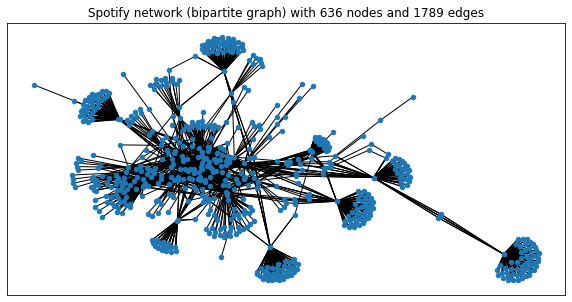

In [29]:
plt.figure(figsize=(10,5))
nx.draw_networkx(spotify, with_labels=False, node_size=20)
plt.title("Spotify network (bipartite graph) with {:d} nodes and {:d} edges".format(len(spotify.nodes), 
                                                                                    len(spotify.edges)))
plt.show()

## Playlists projected graph

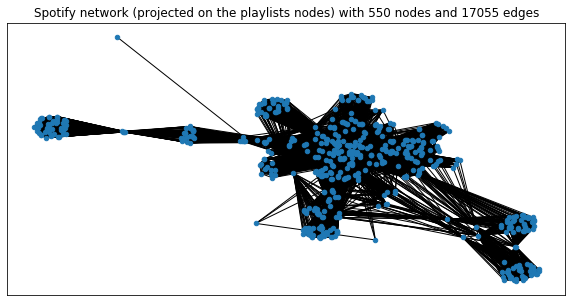

In [31]:
playlists_projection = nx.read_gpickle('../data/playlists_projection_{:d}.gpkl'.format(N))
plt.figure(figsize=(10,5))
plt.title("Spotify network (projected on the playlists nodes) \
with {:d} nodes and {:d} edges".format(len(playlists_projection.nodes), 
                                                    len(playlists_projection.edges)))
nx.draw_networkx(playlists_projection, with_labels=False, node_size=20)
plt.show()

## Artists projected graph

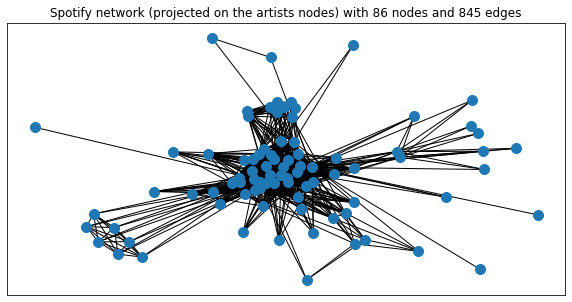

In [219]:
artists_projection = nx.read_gpickle('../data/artists_projection_{:d}.gpkl'.format(N))
plt.figure(figsize=(10,5))
plt.title("Spotify network (projected on the artists nodes) \
with {:d} nodes and {:d} edges".format(len(artists_projection.nodes), 
                                                    len(artists_projection.edges)))
nx.draw_networkx(artists_projection, with_labels=False, node_size=100)
plt.show()

# Metrics

Choose either playlists or artists to compute some metrics

In [241]:
G, node_size = playlists_projection, 20
# G, node_size = artists_projection, 100

# Position to draw all the plots with the same network structure
pos = nx.spring_layout(G)

## Radius, Diameter

In [225]:
diamG = nx.diameter(G)
radG = nx.radius(G)
%time print("The radius of this network is {:d} and the diameter is {:d}".format(radG, diamG))

The radius of this network is 2 and the diameter is 4
Wall time: 0 ns


## Centrality, Peripherial nodes and Eccentricity

Computing centrality... DONE
Computing peripherial nodes... DONE
Computing eccentricity... DONE


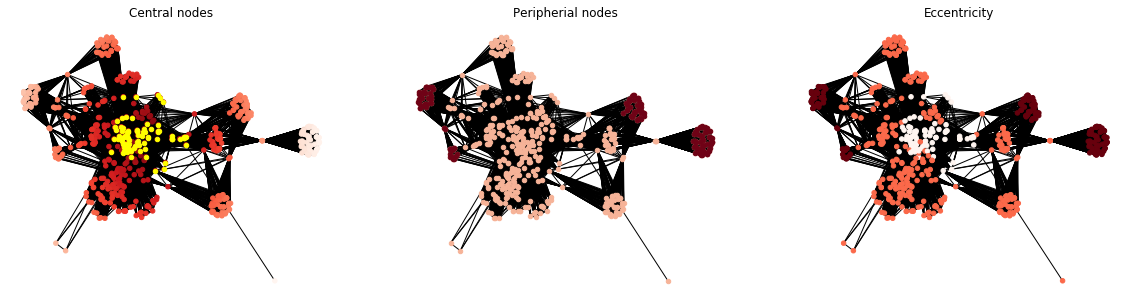

In [267]:
fig = plt.figure(figsize=(20,5))

# 1. Centrality
print("Computing centrality... ",end="")
ax = fig.add_subplot(1,3,1)
ax.set_title("Central nodes")

node_colors = np.array([np.sqrt((xy**2).sum()) for xy in pos.values()])
node_colors = 1-((node_colors-min(node_colors))/(max(node_colors)-min(node_colors)))
nx.draw(G, pos, node_color=node_colors, node_size=node_size, cmap=plt.cm.Reds)

# Compute the center and draw the center nodes in a highlighted color
center = nx.center(G)
nx.draw_networkx_nodes(center, pos, node_size=node_size, node_color='#ffff00')
print("DONE")

# 2. Peripherial nodes
print("Computing peripherial nodes... ",end="")

ax = fig.add_subplot(1,3,2)
ax.set_title("Peripherial nodes")
nx.draw(G, pos, node_size=node_size, node_color='#f6b398')

# Compute the periphery and draw the center nodes in a highlighted color
perip = nx.periphery(G)
nx.draw_networkx_nodes(perip, pos, node_size=node_size, node_color='#6f0216')
print("DONE")


# 3. Excentricity nodes
print("Computing eccentricity... ",end="")

ax = fig.add_subplot(1,3,3)
ax.set_title("Eccentricity")

node_colors = np.array(list(nx.eccentricity(G).values()))
# node_colors = (node_colors-min(node_colors))/(max(node_colors)-min(node_colors))

nx.draw(G, pos, node_color=node_colors, node_size=node_size, cmap=plt.cm.Reds)
print("DONE")


plt.show()

Here we can see:
1. Nodes centrals pintats de groc, resta amb degradat (darker->more central)
2. Periferial foscos
3. 3 tipus eccentricity (darker-> more eccentricity)

## Shortest paths

Computing radius dijkstra... DONE
Computing diameter dijkstra... DONE


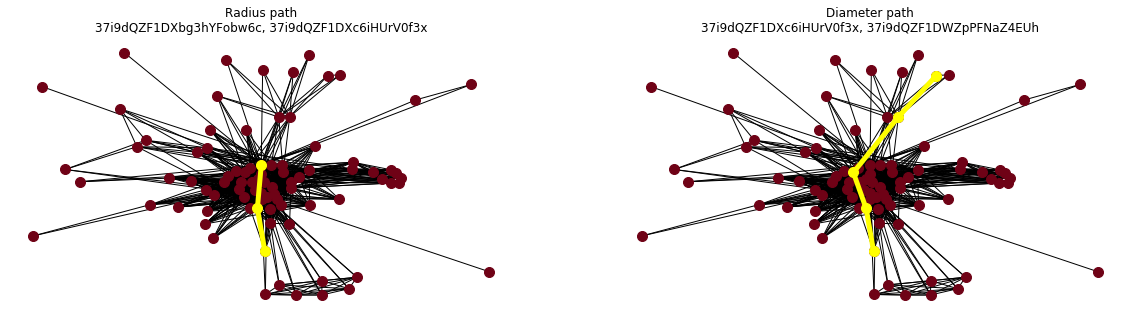

In [227]:
fig = plt.figure(figsize=(20,5))

# 1. Dijkstra (radius)
print("Computing radius dijkstra... ",end="")
ax = fig.add_subplot(1,2,1)
ax.set_title("Radius path")
nx.draw(G, pos, node_size=node_size, node_color='#6f0216')

n1,n2 = nx.center(G)[0], nx.periphery(G)[0]
dij = nx.dijkstra_path(G,n1,n2)

nx.draw_networkx_nodes(dij, pos, node_size=node_size, node_color='#ffff00')
col = nx.draw_networkx_edges(G, pos, 
                       edgelist=list(zip(dij,dij[1:])),
                       node_size=node_size, edge_color='#ffff00', width=5)
ax.set_title("Radius path\n{:s}, {:s}".format(n1, n2))
col.set_zorder(10)
print("DONE")


# 2. Dijkstra (diameter)
print("Computing diameter dijkstra... ",end="")
ax = fig.add_subplot(1,2,2)
nx.draw(G, pos, node_size=node_size, node_color='#6f0216')

# Find nodes with maximum excentricity
sort = sorted(nx.eccentricity(G).items(), key=lambda x: x[1], reverse=True)
candidates = list(map(lambda x: x[0], filter(lambda x: x[1]==sort[0][1], sort)))
for i,j in [(i,j) for i in range(len(candidates)) for j in range(i+1,len(candidates))]:
    dij = nx.dijkstra_path(G,candidates[i], candidates[j])
    
    # Keep a pair of nodes their path is equal to the diameter + 1
    if len(dij)==diamG+1:
        break
ax.set_title("Diameter path\n{:s}, {:s}".format(candidates[i], candidates[j]))

            
nx.draw_networkx_nodes(dij, pos, node_size=node_size, node_color='#ffff00')
col = nx.draw_networkx_edges(G, pos, 
                       edgelist=set(zip(dij,dij[1:])),
                       node_size=node_size, edge_color='#ffff00', width=5)
col.set_zorder(10)


print("DONE")

plt.show()

## Clustering

Computing clustering... DONE


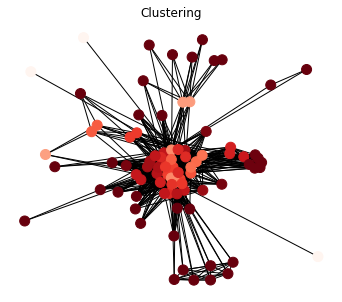

In [235]:
fig = plt.figure(figsize=(20,5))
print("Computing clustering... ",end="")
ax = fig.add_subplot(1,3,1)
ax.set_title("Clustering")

node_colors = np.array(list(nx.clustering(G).values()))
node_colors = (node_colors-min(node_colors))/(max(node_colors)-min(node_colors))
nx.draw(G, pos, node_color=node_colors, node_size=node_size, cmap=plt.cm.Reds)

print("DONE")


# Degree distribution

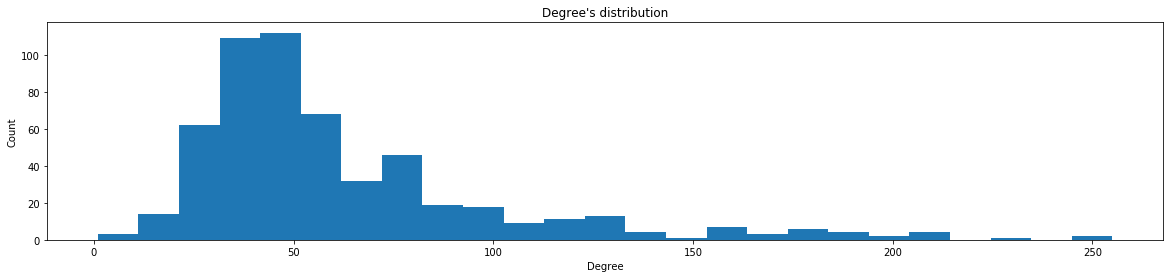

In [265]:
degrees = list(dict(G.degree()).values())
plt.figure(figsize=(20,4))
plt.hist(degrees, bins=25)
plt.title('Degree\'s distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()